<a href="https://colab.research.google.com/github/hanypoh/E-commerce-Data-Clustering/blob/main/Clustering_Tokopedia_Hani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/contoh_tokopedia.csv'
data = pd.read_csv(file_path)

In [ ]:
print(data.head())


         category          city  gold_merchant  \
0  Fashion Wanita  Kota Bandung           True   
1  Fashion Wanita  Kota Bandung           True   
2  Fashion Wanita       Jakarta          False   
3  Fashion Wanita  Kota Bandung           True   
4  Fashion Wanita  Kota Bandung           True   

                                           image_url  jumlah_review  \
0  https://ecs7.tokopedia.net/img/cache/200-squar...            954   
1  https://ecs7.tokopedia.net/img/cache/200-squar...            761   
2  https://ecs7.tokopedia.net/img/cache/200-squar...            439   
3  https://ecs7.tokopedia.net/img/cache/200-squar...            909   
4  https://ecs7.tokopedia.net/img/cache/200-squar...            614   

  jumlah_view      location  presentase_diskon  price  product_id  \
0           0  Kota Bandung                  0  55000   284008675   
1           0  Kota Bandung                  0  65000   283976385   
2           0       Jakarta                  0  59000   316717554

In [ ]:
# Assuming the columns to cluster are numerical, if not we need to encode categorical variables
# Selecting numerical columns for clustering
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = data[numerical_cols]

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

In [ ]:
# Determine the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

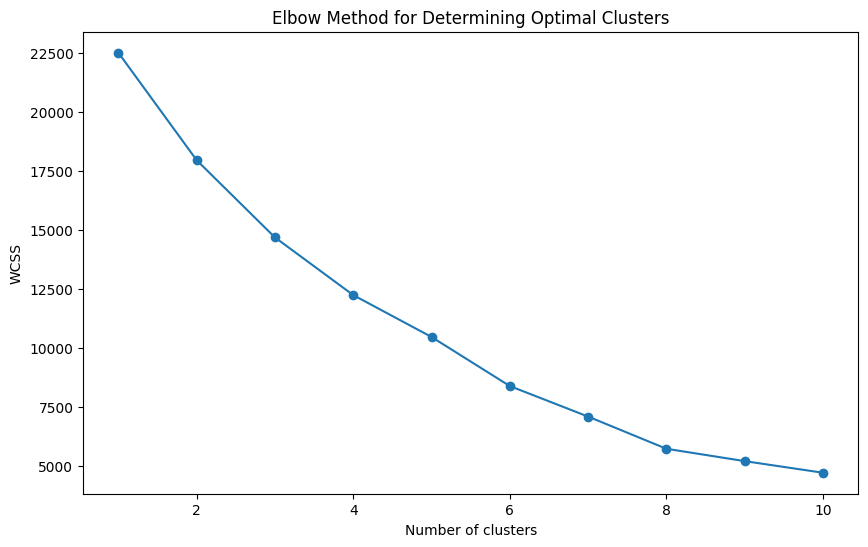

In [ ]:
# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11, 1), wcss, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.show()

In [ ]:
# Choose the optimal number of clusters, e.g., 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Display cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)

Cluster centers:
[[-6.55695723e-02  0.00000000e+00  4.30318037e-02  8.13559176e-02
  -2.27415774e-02  3.54620618e-01]
 [ 8.48940286e-03  0.00000000e+00 -3.04544268e-01 -6.06274363e-01
  -9.22757115e-02 -2.64260180e+00]
 [ 1.02043951e+01  0.00000000e+00 -4.78274396e-01 -2.69762118e-01
   5.51978133e+00 -1.17741897e+00]]


In [ ]:
# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

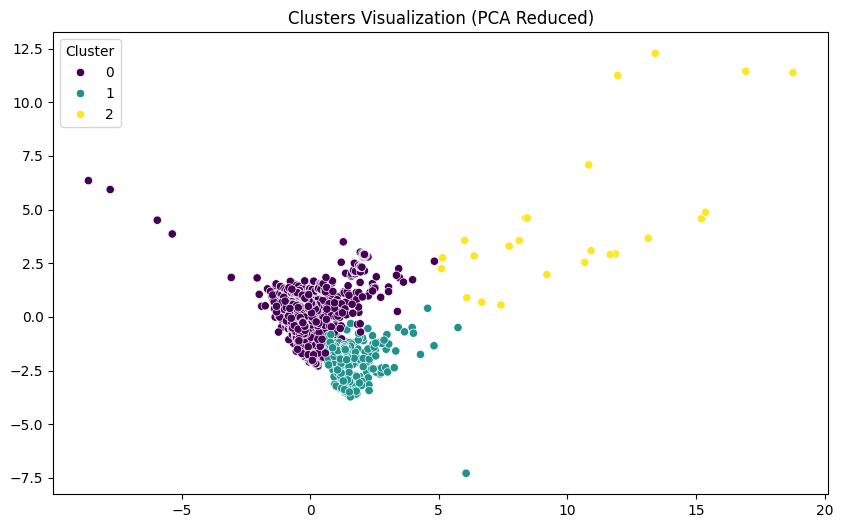

In [ ]:
# Visualize the clusters (if the data is 2-dimensional, otherwise we can use PCA for dimensionality reduction)
if data_scaled.shape[1] == 2:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('Clusters Visualization')
    plt.show()
else:
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data_scaled)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('Clusters Visualization (PCA Reduced)')
    plt.show()

